# Road to Aiyagari(1994, QJE)

### TA : Yeongwoong Do

## 1. "While" command / Solow model


Here, we first implement the Solow(1956) due to learning "While" command

The description of model is as follows.

Technology : $Y_t = A_t K_t^{\alpha} L_t^{1-\alpha} ~~\rightarrow~~ y_t=A_t k_t^{\alpha} $

Law of motion: $K_{t+1} = I_t + (1-\delta) K_t $

Aggregate demand: $Y_t = C_t + I_t = (1-s) Y_t + sY_t$

Population growth: $L_{t+1} = (1+n)L_t $  note that $L=N$

Tech progress: $A_{t+1} = (1+g) A_t $

Set parameters following figures.

$s=0.3, ~~ \delta = 0.10, ~~\alpha=0.33, ~~n=0, ~~ g=0.03~~, k_0=0.25$




Key equation: (discrete time version)

$k_{t+1} = \frac{s k_t^{\alpha} + (1-\delta) k_0}{(1+n)(1+g)} $

In [1]:
# parameters
s, δ, α, n, g, k_0 = 0.3, 0.10, 0.33, 0, 0.03, 0.25

In [2]:
# example law of motion

k_1 = (s * k_0**α+(1-δ)*k_0)/((1+n)*(1+g))
print (k_1)

0.4027800865005262


In [6]:
k_2 = (s * k_0**α+(1-δ)*k_0)/((1+n)*(1+g))
print (f"k_2 = {k_2}")

k_2 = 0.4027800865005262


Steady state

Analytical solution: $k_{ss} = \left( \frac{s}{n+g+\delta} \right)^{1/(1-\alpha)} $

In [9]:
# Analytical solution
k_ss_A = (s/(n+g+δ))**(1/(1-α))
print(f"the steady state value of per capital is {k_ss_A}.")

the steady state value of per capital is 3.483826920620455.


In [8]:
# we need "numpy"!
import numpy as np

In [13]:
# Numerical solution

tolerance = 1e-5
error = 10
max_iter=500
i = 0
k_old = k_0

while i<max_iter and error>tolerance:
    k_next = (s * k_old**α+(1-δ)*k_old)/((1+n)*(1+g))
    error = np.abs(k_next-k_old)
    k_old = k_next  # updating
    i += 1

k_ss_N = k_old
print(f"The numerical solution is {k_ss_N}.")

The numerical solution is 3.483724808555492.


In [14]:
print(f"The iteration was {i}")

The iteration was 121


That's it! The convergence loop!

But you want to see more. Like a graph or how to converge....

First, we draw the graph which looks very familar to you.

In [15]:
# prepare for graph
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(10,6)

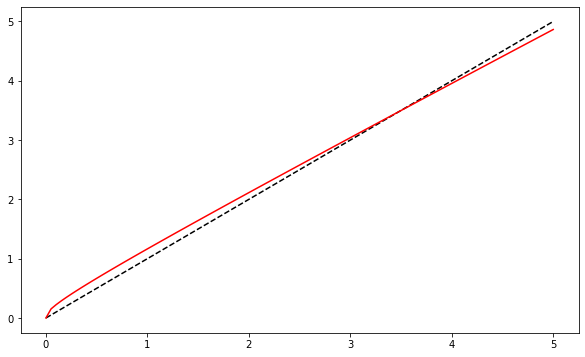

In [17]:
# graph 1

k_grid = np.linspace(0, 5, 100)
k_next_vec = (s*k_grid**(α)+(1-δ)*k_grid)/((1+n)*(1+g))

plt.plot(k_grid, k_grid, ls='--', c='black')
plt.plot(k_grid, k_next_vec, c='red')
plt.show()

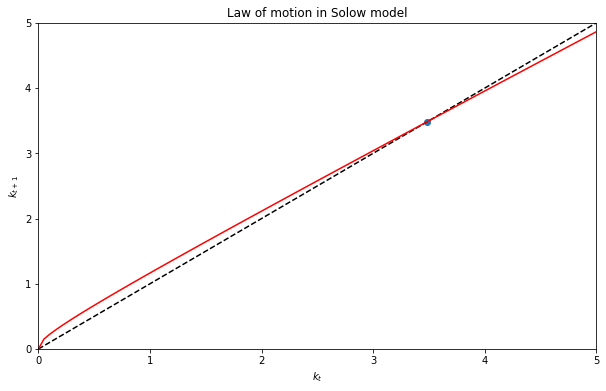

In [19]:
# A few technique for graph 1

plt.plot(k_grid, k_grid, ls='--', c='black')
plt.plot(k_grid, k_next_vec, c='red')
plt.title("Law of motion in Solow model")
plt.ylim([0,5])
plt.xlim([0,5])
plt.ylabel("$k_{t+1}$")
plt.xlabel("$k_t$")
plt.scatter(k_ss_A, k_ss_A)
plt.show()

Second, I want to draw the transition path.

How to I get the transition values of per capital?

We need to return the "while" command and fix it!

In [20]:
# Numerical solution2

tolerance = 1e-5
error = 10
max_iter=500
i = 0
k_old = k_0
k_his = [k_0]

while i<max_iter and error>tolerance:
    k_next = (s * k_old**α+(1-δ)*k_old)/((1+n)*(1+g))
    error = np.abs(k_next-k_old)
    k_old = k_next  # updating
    i += 1
    k_his = k_his + [k_next]

In [21]:
k_his

[0.25,
 0.4027800865005262,
 0.5676965780053507,
 0.7376708507941613,
 0.90800492956524,
 1.0755348792159813,
 1.23813368651007,
 1.3943984206737636,
 1.5434425638965366,
 1.6847525791367384,
 1.8180859046788733,
 1.9433968340248229,
 2.0607818091966403,
 2.170438592786128,
 2.2726355717413793,
 2.3676885804325507,
 2.45594337678979,
 2.5377624113610935,
 2.6135148813782876,
 2.68356931262935,
 2.7482880938199328,
 2.8080235222335186,
 2.8631150197994555,
 2.9138872545825887,
 2.9606489607382622,
 3.003692294726656,
 3.043292600343284,
 3.079708482293658,
 3.1131821093865204,
 3.1439396852608374,
 3.172192037892533,
 3.198135289706595,
 3.221951578531959,
 3.2438098063324188,
 3.2638663979791804,
 3.282266056576193,
 3.299142505226237,
 3.314619207806941,
 3.328810063449077,
 3.3418200710846127,
 3.3537459617471828,
 3.3646767973336384,
 3.3746945353291355,
 3.3838745596057236,
 3.392286177862769,
 3.399993086616688,
 3.407053804891711,
 3.413522077932326,
 3.419447252367527,
 3.424874

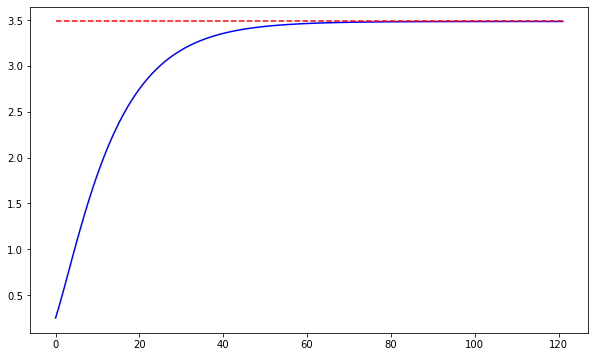

In [22]:
# graph 2
T= len(k_his)
time=np.linspace(0, T-1, T)

plt.plot(time, k_his, c='blue')
plt.plot(time, k_ss_N*np.ones(T), ls='--', c='red')
plt.show()

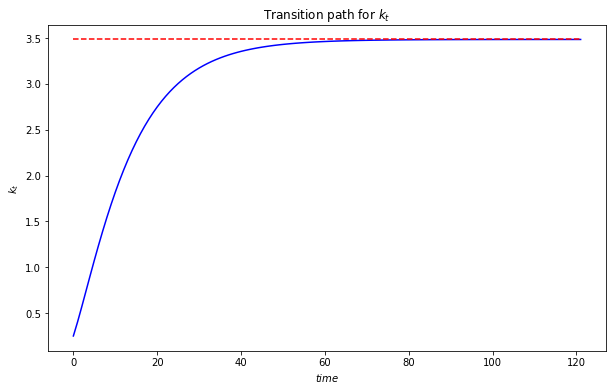

In [23]:
# A few technique for graph 2

plt.plot(time, k_his, c='blue')
plt.plot(time, k_ss_N*np.ones(T), ls='--', c='red')
plt.title("Transition path for $k_t$")
plt.ylabel("$k_{t}$")
plt.xlabel("$time$")
plt.show()

What if, the professor want to other results such as "changing the parameter values...."

If we change the directly, this behavior will only confuse your computer and make you tired....

Then, what should you do?

Construct the "class"! That's the answer of the Python.

If you want to know the meaning of class, you can refer to various web sites.

But in economics class, you can just think of a class as an economic model.

In [25]:
class Solow:
    """
    Solow(1956), Find the steady state and draw a transtion graph
    """
    
    def __init__(self, s=0.3, δ=0.10, α=0.33, n=0.0, g=0.03, k_0=0.25):
        self.s, self.δ, self.α, self.n, self.g, self.k_0 = s, δ, α, n, g, k_0

In [27]:
# meaning of "init" function

model1 = Solow()
model1.s

0.3

In [29]:
model1.k_0

0.25

In [30]:
class Solow:
    """
    Solow(1956), Find the steady state and draw a transtion graph
    """
    
    def __init__(self, s=0.3, δ=0.10, α=0.33, n=0.0, g=0.03, k_0=0.25):
        self.s, self.δ, self.α, self.n, self.g, self.k_0 = s, δ, α, n, g, k_0
        
    def Analytical(self):
        s, δ, α, n, g, k_0 = self.s, self.δ, self.α, self.n, self.g, self.k_0
        k_ss_A = (s/(n+g+δ))**(1/(1-α))
        return k_ss_A
    
    def Numerical(self):
        s, δ, α, n, g, k_0 = self.s, self.δ, self.α, self.n, self.g, self.k_0
        tolerance = 1e-5
        error = 10
        max_iter=500
        i = 0
        k_old = k_0
        k_his = [k_0]

        while i<max_iter and error>tolerance:
            k_next = (s * k_old**α+(1-δ)*k_old)/((1+n)*(1+g))
            error = np.abs(k_next-k_old)
            k_old = k_next  # updating
            i += 1
            k_his = k_his + [k_next]
            
        return k_old

In [31]:
# run using class

model1 = Solow()
model1.Numerical()

3.483724808555492

In [32]:
# professor ask me to change the s=0.4

model2 = Solow(s=0.4)
model2.Numerical()

5.352092773419732

In [33]:
# professor ask me to change the delta=0.08
model3 = Solow(δ=0.08)
model3.Numerical()

4.470221039216937

In [35]:
class Solow:
    """
    Solow(1956), Find the steady state and draw a transtion graph
    """
    
    def __init__(self, s=0.3, δ=0.10, α=0.33, n=0.0, g=0.03, k_0=0.25):
        self.s, self.δ, self.α, self.n, self.g, self.k_0 = s, δ, α, n, g, k_0
        
    def Analytical(self):
        s, δ, α, n, g, k_0 = self.s, self.δ, self.α, self.n, self.g, self.k_0
        k_ss_A = (s/(n+g+δ))**(1/(1-α))
        return k_ss_A
    
    def Numerical(self):
        s, δ, α, n, g, k_0 = self.s, self.δ, self.α, self.n, self.g, self.k_0
        tolerance = 1e-5
        error = 10
        max_iter=500
        i = 0
        k_old = k_0
        k_his = [k_0]

        while i<max_iter and error>tolerance:
            k_next = (s * k_old**α+(1-δ)*k_old)/((1+n)*(1+g))
            error = np.abs(k_next-k_old)
            k_old = k_next  # updating
            i += 1
            k_his = k_his + [k_next]
            
        return k_his, k_old
    
    def Fixed_point_graph(self, k_lower=0, k_upper=5, N=100):
        s, δ, α, n, g, k_0 = self.s, self.δ, self.α, self.n, self.g, self.k_0
        k_grid = np.linspace(k_lower, k_upper, N)
        k_next_vec = (s*k_grid**(α)+(1-δ)*k_grid)/((1+n)*(1+g))
        plt.plot(k_grid, k_grid, ls='--', c='black')
        k_ss_A = self.Analytical()  # get an innter function using "self"
        
        plt.plot(k_grid, k_grid, ls='--', c='black')
        plt.plot(k_grid, k_next_vec, c='red')
        plt.title("Law of motion in Solow model")
        plt.ylabel("$k_{t+1}$")
        plt.xlabel("$k_t$")
        plt.scatter(k_ss_A, k_ss_A)
        plt.show()
        
    def Transition_graph(self):
        s, δ, α, n, g, k_0 = self.s, self.δ, self.α, self.n, self.g, self.k_0
        k_his, k_ss_N = self.Numerical()
        T= len(k_his)
        time=np.linspace(0, T-1, T)
        
        plt.plot(time, k_his, c='blue')
        plt.plot(time, k_ss_N*np.ones(T), ls='--', c='red')
        plt.title("Transition path for $k_t$")
        plt.ylabel("$k_{t}$")
        plt.xlabel("$time$")
        plt.show()

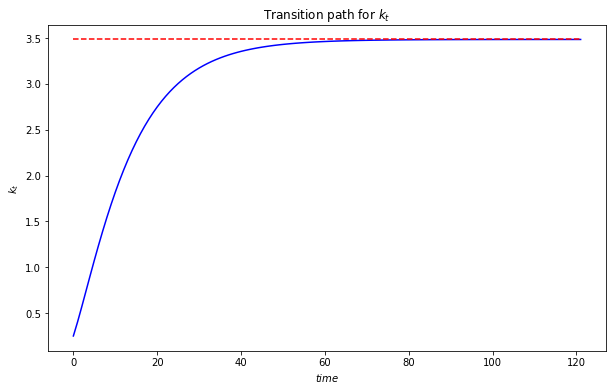

In [36]:
# Show time!

model1=Solow()
model1.Transition_graph()

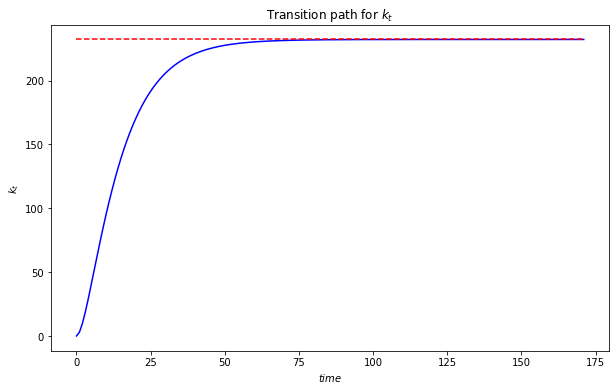

In [37]:
model2=Solow(s=5)
model2.Transition_graph()

So, many coders prefer to use class rather than typing them in directly.

## 2. VFI, RA model(Cake-eating problem)

Now, it's time for Value function iteration!


$\underset{ \left\{ c_t, k_{t+1} \right\}_{t=0}^{\infty}}{max} ~~ \sum_{t=0}^{\infty} \beta^t u(c_t)~~~ s.t.~~
    \begin{cases} c_t + k_{t+1} \le f(k_t) +(1-\delta) k_t  ~~ \forall t\geq 0 \\
    c_t \geq 0  ~~\forall t\geq 0 \\
    k_{t+1} \geq 0, ~~ k_0 ~\text{given} ~~ \forall t\geq 0
    \end{cases} $
    
The advantage of cake-eating problem is that we can derive the analytical solution.

If we assume the $u(c)=log(c)$, $f(k)=k$ and $\delta=0$, then 


Bellman equation: $V(k) = \underset{ \left\{ 0 \leq k' \leq k \right\} }{max} log(k - k') + \beta V(k')$


Analytical solution:

$c_t^* = k_0 (1-\beta) \beta^t $

$k_{t+1} = \beta k_t ~~\forall t\geq0 $

In [38]:
# paramerter
β, k_0 = 0.96, 2

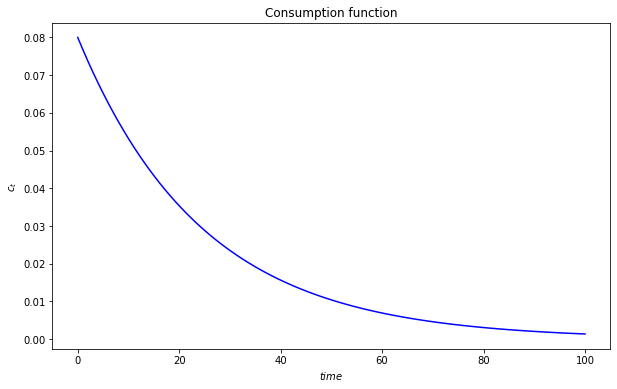

In [40]:
# Analytical solution

time = np.linspace(0,100,100)
c_vec = k_0*(1-β)*β**time

plt.plot(time, c_vec, c='blue')
plt.title("Consumption function")
plt.ylabel("$c_{t}$")
plt.xlabel("$time$")
plt.show()

What about policy function?

We want to draw $k'=g(k)$!

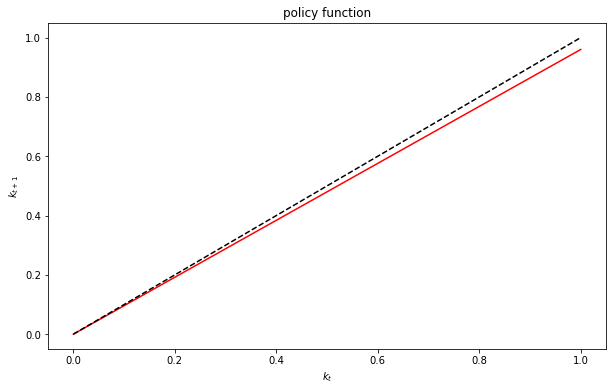

In [42]:
# Analytical solution

k_grid = np.linspace(0,1,100)
k_vec = β*k_grid

plt.plot(k_grid, k_vec, c='red')
plt.plot(k_grid, k_grid, c='black', ls='--')
plt.title("policy function")
plt.ylabel("$k_{t+1}$")
plt.xlabel("$k_t$")
plt.show()

What about value function?

Since, $c=g_c(k)=(1-β)k $, so, by using the guess and verify method, 

$v(k)=\frac{log(k)} { (1-\beta)}+ \frac{\beta}{(1-\beta)^2}log \beta + \frac{log(1-\beta)}{(1-\beta)}$

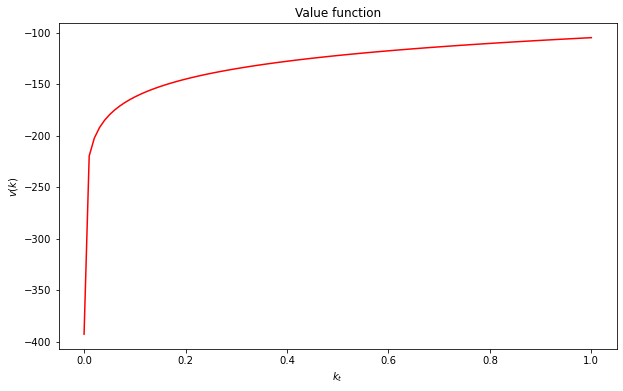

In [232]:
# Analytical solution

k_grid = np.linspace(1e-5,1,100)
value_vec = np.log(k_grid)/(1-β) + (β/(1-β)**2)*np.log(β) + np.log(1-β)/(1-β)

plt.plot(k_grid, value_vec, c='red')
plt.title("Value function")
plt.ylabel("$v(k)$")
plt.xlabel("$k_t$")
plt.show()

This is the answer!

Let's approxy this answer using the numerical method.

The numerical algorithm of VFI in textbook is as follows.

step1) Guess $V_0$

step2) Given $V_n$, get $V_{n+1}$ using $V_{n+1}(k) = max_{k'} ~~u(k-k')+\beta V_n(k')$.

step3) Iterate step2 until $|V_{n+1}-V_n| < tolerance$

The "max" in step2 really matter. 

But here we skip the interpolation part, just use discretinized space of $k$.

Hence, for "max", you can use the default built-in function (find the largest value in array) 

rather than an optimization mechanism.(Advanced!!)

Before the loop struction, we need to set "numerical log utility function"

In [248]:
# VFI
N=500 # the number of grid points
k_grid=np.linspace(1e-5,k_0,N)  #

# step1) Guess V0
V_0=np.zeros(N) # zero vector!

# step2) Gen V_n+1
V_old = V_0
tolerance = 1e-5
error = 10
max_iter=1000
iternum = 0

while iternum<max_iter and error>tolerance:
    V_next = np.zeros(N)
    policy = np.zeros(N)
    for i, k in enumerate(k_grid):
        RHS_vector =[np.log(k-k_grid[j]) + β* V_old[j] if k-k_grid[j] > 0 else -400 for j in range(N)]
        V_next[i] = np.max(RHS_vector)
        policy[i] = k_grid[np.argmax(RHS_vector)]
    #step 3) update until convergence
    error = np.max(np.abs(V_next-V_old))
    iternum += 1
    V_old=V_next

In [249]:
print(f"The iteration number was {iternum}.")

The iteration number was 159.


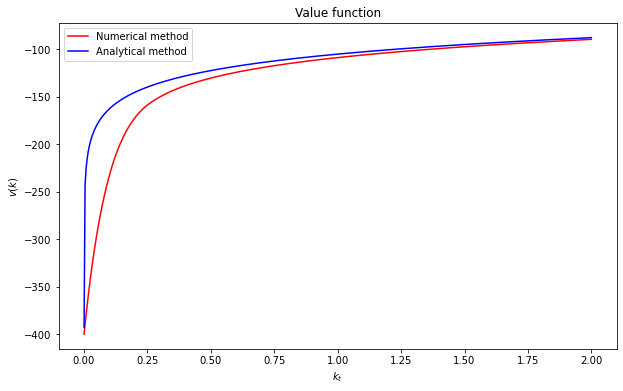

In [250]:
# Numerical solution
value_vec = np.log(k_grid)/(1-β) + (β/(1-β)**2)*np.log(β) + np.log(1-β)/(1-β)

plt.plot(k_grid, V_old, c='red', label="Numerical method")
plt.plot(k_grid, value_vec, c='blue', label="Analytical method")
plt.title("Value function")
plt.ylabel("$v(k)$")
plt.xlabel("$k_t$")
plt.legend()
plt.show()

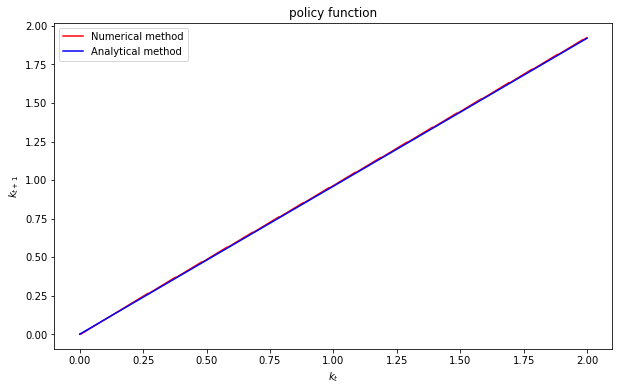

In [251]:
# Analytical solution
k_vec = β*k_grid

plt.plot(k_grid, policy, c='red', label="Numerical method")
plt.plot(k_grid, k_vec, c='blue', label="Analytical method")
plt.title("policy function")
plt.ylabel("$k_{t+1}$")
plt.xlabel("$k_t$")
plt.legend()
plt.show()

In [277]:
class cake_eating:
    """
    cake_eating problem
    """
    
    def __init__(self, β= 0.96, k_0=2):
        self.β, self.k_0 = β, k_0
        
    def Analytical_value(self, k_grid):
        β = self.β
        V_A = np.log(k_grid)/(1-β) + (β/(1-β)**2)*np.log(β) + np.log(1-β)/(1-β)
        return V_A
    
    def Analytical_policy(self, k_grid):
        β = self.β
        return β*k_grid
    
    def VFI(self, tolerance=1e-5, max_iter=1000, N=500):
        β, k_0 = self.β, self.k_0
        k_grid=np.linspace(1e-5,k_0,N)
        # step1) Guess V0
        V_0=np.zeros(N) # zero vector!
        # step2) Gen V_n+1
        V_old = V_0
        error = 10
        iternum = 0
        while iternum<max_iter and error>tolerance:
            V_next = np.zeros(N)
            policy = np.zeros(N)
            for i, k in enumerate(k_grid):
                RHS_vector =[np.log(k-k_grid[j]) + β* V_old[j] if k-k_grid[j] > 0 else -400 for j in range(N)]
                V_next[i] = np.max(RHS_vector)
                policy[i] = k_grid[np.argmax(RHS_vector)]
            #step 3) update until convergence
            error = np.max(np.abs(V_next-V_old))
            iternum += 1
            V_old=V_next
            
        return k_grid, V_next, policy
    
    def graph_value(self, N=500):
        k_grid, V_numerical, policy = self.VFI(N=N)
        value_vec = self.Analytical_value(k_grid=k_grid)
        
        plt.plot(k_grid, V_old, c='red', label="Numerical method")
        plt.plot(k_grid, value_vec, c='blue', label="Analytical method")
        plt.title("Value function")
        plt.ylabel("$v(k)$")
        plt.xlabel("$k_t$")
        plt.legend()
        plt.show()
        
    def graph_policy(self, N=500):
        k_grid, V_numerical, policy = self.VFI(N=N)
        k_vec = self.Analytical_policy(k_grid=k_grid)
        
        plt.plot(k_grid, policy, c='red', label="Numerical method")
        plt.plot(k_grid, k_vec, c='blue', label="Analytical method")
        plt.title("policy function")
        plt.ylabel("$k_{t+1}$")
        plt.xlabel("$k_t$")
        plt.legend()
        plt.show()

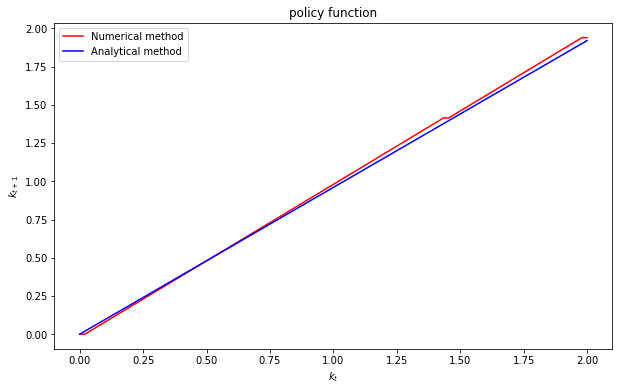

In [278]:
cake_eating_test=cake_eating()
cake_eating_test.graph_policy(N=100)

## 3. Monte Carlo Simulation

Let's get the last instument. The Monte Carlo simulation!

It is not useful for macroeconomics, but for every empirical field.

First, we neet to learn how to generate random number.

In [257]:
A=np.random.rand(5) # uniform distribution U [0,1]
print(A)

[0.4989848  0.73980218 0.8683626  0.6253143  0.53059586]


In [258]:
B=np.random.randint(2, size=5) # discretinized uniform distribution DU {0,1}
print(B)

[1 1 0 1 1]


How to apply the Markov transition matrix to allocating probability?

We need to use the fact that the distrubtion eventually means the cumulative distribution function.

So, What we do is as follows.

step1) toss the coin or roll the dice. (generate random number)

step2) Assume that the CDF is $[0.4, 0.8, 1.0]$,

       then, if random number is less than 0.4, then give first value.
   
             if random number is greater than 0.4 but less than 0.8, then give second value.
             
             if random numbr is greather than 0.8, then give third value.

In [262]:
value=np.zeros_like(A)
value  

array([0., 0., 0., 0., 0.])

In [263]:
income_set=np.array([0.7, 1.0, 1.3])
income_set

array([0.7, 1. , 1.3])

In [264]:
CDF=np.array([0.4, 0.8, 1.0])
CDF

array([0.4, 0.8, 1. ])

In [265]:
for i, a in enumerate(A):
    if a < CDF[0]:
        value[i]=income_set[0]
    elif CDF[0]<= a < CDF[1]:
        value[i]=income_set[1]
    else:
        value[i]=income_set[2]

In [266]:
print(value)

[1.  1.  1.3 1.  1. ]


We want to get the $E[Z'|Z]$ when Z ~ Markov process with transition probability matrix $\Pi$

In [267]:
def Z_next(Π, z):
    """
    Given "z index" sequnce,
    calculate transtion Z_t(index) -> Z_t+1(index)
    """
    CumΠ = np.cumsum(Π, axis=1)
    N=len(z)
    ϵ=np.random.rand(N)
    z_next=np.zeros_like(z)
    for i in range(N):
        idx=(np.abs(ϵ[i] - CumΠ[z[i],:])).argmin()
        dis =CumΠ[z[i],idx]-ϵ[i]
        z_next[i]=idx if dis>=0 else idx+1
    return z_next

Example)

$ Z= [0, 1]$

$\Pi=\begin{bmatrix} 0.9 & 0.1 \\ 0.1 & 0.9\end{bmatrix} $



In [269]:
z=np.array([0,1])
Π=np.array([[0.9, 0.1],
            [0.1, 0.9]])

In [270]:
Z_next(Π=Π, z=z)

array([0, 1])

In [271]:
Z_next(Π=Π, z=z)

array([1, 1])

In [272]:
Z_next(Π=Π, z=z)

array([0, 1])